## Tarea 2 del curso CM-072

* Nombre y apellidos: Luis Vasquez Espinoza
* Fecha de presentación: 19 de setiembre

Esta tarea utiliza un pequeño subconjunto de los datos de la competencia de Kaggle  [Yelp Business Rating Prediction ](https://www.kaggle.com/c/yelp-recsys-2013).

* Descripción de la data
    - `yelp.json` es el formato original del archivo y `yelp.csv` contiene los mismos datos, en un formato más conveniente. Ambos archivos están en esta carpeta de la tarea, por lo que no es necesario descargar los datos del sitio web de Kaggle.

    - Cada observación en este conjunto de datos es una revisión de un negocio en particular por un usuario en particular.

    - La columna "stars" es la cantidad de estrellas (1 a 5) asignadas por el revisor al negocio. (Estrellas más altas indican mejores puntuaciones.) En otras palabras, es la calificación del negocio por la persona que escribió la revisión.
 
    - La columna "cool" es la cantidad de votos "cool" que recibió esta crítica de otros usuarios de Yelp. Todas las reseñas comienzan con 0 votos "cools" y no hay límite para la cantidad de votos "cools" que puede recibir una revisión. En otras palabras, es una calificación de la revisión en sí misma, no una calificación de la empresa.
   
    - Las columnas "useful" y "funny" son similares a la columna "cool".
    
* Sugerencia: En estos ejercicios debes utilizar los siguientes commandos de scikit learn:

    - [from sklearn.linear_model import LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).
    - [from sklearn.cross_validation import train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    - [from sklearn import metrics](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

## Preguntas

1. Lea yelp.csv en un DataFrame.


In [64]:
import pandas as pd

yelp_df = pd.read_csv("yelp.csv")
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


2. Ignoramos el archivo `yelp.csv` y construye un DataFrame de `yelp.json`. Esto implica leer los datos en Python, decodificar el JSON, convertirlo en un DataFrame y agregar columnas individuales para cada uno de los tipos de votos.

In [65]:
# Tu solucion
# LEER EL OUTPUT, AHI SE ANOTAN LAS OBSERVACIONES
import ast

# Leemos el archivo yelp.json
yelp_json = open('yelp.json')
# Para cada linea de dicho archivo generamos un arreglo de
# diccionarios a partir de la evaluacion de sus entradas raw
yelp_JSON_data = [ast.literal_eval(line) for line in yelp_json]
# Creamos el df
yelp_df_fromJSON = pd.DataFrame(yelp_JSON_data)

print("======================================================")
print("Info() del df del .csv")
print("------------------------------------------------------")
print(yelp_df.info())
print("======================================================")
print("Info() del df del .json (sin corregir)")
print("------------------------------------------------------")
print(yelp_df_fromJSON.info())
print("------------------------------------------------------")
print("Notamos una discrepancia en el numero de columnas")
print("Esto debido a la forma de la ultima columna, la cual falta desdoblar:")
print("------------------------------------------------------")
# Comprobamos que en efecto existe una columna extraña requiere un desdoblamiento
print(yelp_df_fromJSON["votes"].head(), end="\n\n")
# Generamos un df a partir de un arreglo conteniendo
# los diccionarios de las votaciones
missing_columns = pd.DataFrame([
    yelp_df_fromJSON["votes"][i] for i in range(len(yelp_df_fromJSON["votes"]))
])

# Eliminamos la columna 'votes' original
yelp_df_fromJSON = yelp_df_fromJSON.drop(["votes"], axis=1)
# Y adjuntamos el df recien generado, ordenando las columnas 'cool', useful' & 'funny'
yelp_df_fromJSON = pd.concat([
    yelp_df_fromJSON,
    missing_columns.reindex(columns=["cool", "useful", "funny"])
], axis=1)

# Luego la info. imprimida tendra sentido
print("======================================================")
print("Nueva info() del df del .json")
print("------------------------------------------------------")
print(yelp_df_fromJSON.info())

# Y la funcion de equivalencia entre df's nos retorna: exito
print("======================================================")
print("¿Son los df's (procedentes del .csv y .json) iguales?:")
print(">", yelp_df.equals(yelp_df_fromJSON))
print("======================================================")

Info() del df del .csv
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB
None
Info() del df del .json (sin corregir)
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type  

Si bien ya corregimos de manera satisfactoria la estructura del segundo dataframe procedente  del .json, el método de comparación aún nos dice que los dataframes no son iguales. Esto debido a que algunos comentarios paracen poseer saltos de linea extras:

In [66]:
# Este metodo no es de mi autoria
# Se extrajo de:
# https://gist.github.com/yassineAlouini/9b36ee91560445ce28b06733a362ced8
import numpy as np

def compare_two_dfs(input_df_1, input_df_2):
    df_1, df_2 = input_df_1.copy(), input_df_2.copy()
    ne_stacked = (df_1 != df_2).stack()
    changed = ne_stacked[ne_stacked]
    changed.index.names = ['id', 'col']
    difference_locations = np.where(df_1 != df_2)
    changed_from = df_1.values[difference_locations]
    changed_to = df_2.values[difference_locations]
    df = pd.DataFrame({'from': changed_from, 'to': changed_to}, index=changed.index)
    return df

temp_df = compare_two_dfs(yelp_df, yelp_df_fromJSON)
print("===========================")
print(temp_df["from"][0])
print("===========================")
print(temp_df["to"][0])
print("===========================")

My co-workers and I refer to this place as "Pizza n' Ants".  The staff will be happy to serve you with bare hands, right after using the till.  Also, as the nickname suggests, there has been a noticable insect problem. 



As if that could all be overlooked, the pizza isn't even good.  If you are in this part of town, go to Z Pizza or Slices for great pizza instead!
My co-workers and I refer to this place as "Pizza n' Ants".  The staff will be happy to serve you with bare hands, right after using the till.  Also, as the nickname suggests, there has been a noticable insect problem. 

As if that could all be overlooked, the pizza isn't even good.  If you are in this part of town, go to Z Pizza or Slices for great pizza instead!


Existen 6 ocurrencias de este estilo, todas similares. Debido a que la información importante persiste no creo que haga falta corregir estas discrepancias.

In [67]:
temp_df

,,from,to
id,col,,
2353,text,"My co-workers and I refer to this place as ""Pi...","My co-workers and I refer to this place as ""Pi..."
4233,text,Terrible coffee. So bitter I would have to du...,Terrible coffee. So bitter I would have to du...
5387,text,I've searched the world for the perfect pepper...,I've searched the world for the perfect pepper...
5703,text,note: the 5 stars i'm giving this place is for...,note: the 5 stars i'm giving this place is for...
8294,text,I almost wept when I saw they had opened a Sli...,I almost wept when I saw they had opened a Sli...
9375,text,Nicely edited selection of mid to high end ele...,Nicely edited selection of mid to high end ele...


 Hasta este punto tanto **yelp_df** como **yelp_df_fromJSON** almacenan los datos esperados.
 ___________

3. Explora la relación entre cada uno de los tipos de votos (cool/useful/funny) y la cantidad de estrellas.

In [68]:
# Tu solucion
# Usando el df producido por el .csv

exploring_df = yelp_df.loc[:,['cool', 'useful', 'funny', 'stars']]
exploring_df.head()

,cool,useful,funny,stars
0,2,5,0,5
1,0,0,0,5
2,0,1,0,4
3,1,2,0,5
4,0,0,0,5


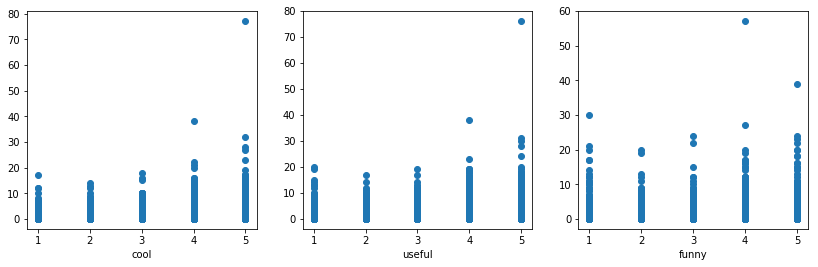

In [69]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

plt.figure(figsize=(14,4))
exploring_df = exploring_df.dropna()
for i, col in zip(range(3), ["cool", "useful", "funny"]):
    plt.subplot(1,3,i+1)
    plt.scatter(exploring_df.loc[:,['stars']], exploring_df.loc[:,[col]])
    plt.xlabel(col)

Debido a la información dispersa que muestra estos datos considero que una buena alternativa  para notar el comportamiento *votos* vs *estrellas* es tomar el maximo de cada uno para mostar un límite en la gráfica 

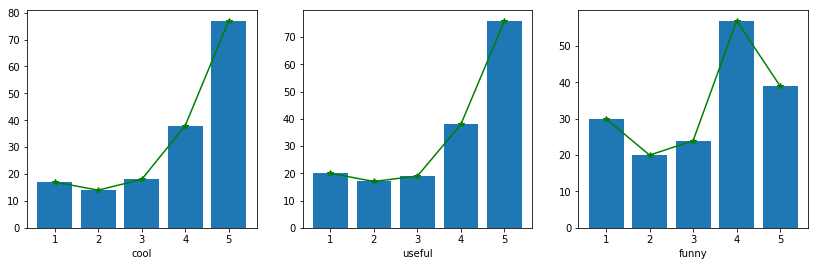

In [70]:
temp_df = exploring_df.groupby('stars').max().reset_index()
plt.figure(figsize=(14,4))
for i, col in zip(range(3), ["cool", "useful", "funny"]):
    plt.subplot(1,3,i+1)
    plt.bar(temp_df.loc[:, "stars"], temp_df.loc[:, col])
    plt.plot(temp_df.loc[:, "stars"], temp_df.loc[:, col], 'g*-')
    plt.xlabel(col)

____________

4. Define `cool/ useful/funny` como características y `stars` como respuesta.

In [71]:
# Tu solucion
X = exploring_df.loc[:, "cool":"funny"]
y = exploring_df.loc[:, "stars"]

5. Ajustamos un modelo de regresión lineal e interpreta los coeficientes. ¿Los coeficientes tienen sentido intuitivo para ti?. Explora el sitio web de Yelp para ver si se puede detectar tendencias similares.
    

In [72]:
# Tu solucion
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
print("COEFS: ", dict(zip(exploring_df.columns.values, lr.coef_))) 
print("INTERCEPTO: ", lr.intercept_)

COEFS:  {'cool': 0.2743594685885306, 'useful': -0.1474523909940152, 'funny': -0.13567449053706174}
INTERCEPTO:  3.8398947927830833


Pronóstico:
1. Cada voto **cool** se asociará al aumento de 0.2743 estrellas
2. Cada voto **useful** se asociará a la disminución de 0.147 estrellas
3. Cada voto **funny** se asociará a la disminución de 0.135 estrellas

Para el **primer caso** tiene sentido que una buena reseña dé evidencia de un buen negocio, y que las personas usualmente asocien el estímulo **cool** (al menos en norteamerica) a una palabra alusciva al *correctness* (no se si esto es traducible). Para el **segundo caso** hace falta entender la posición del cliente para saber por qué también es esperable la disminución de estrellas. A la mayoría de usuarios que usan/revisan reseñas de lugares de interés les importa la opinión de otras personas acerca del mismo, y aprecian más cuando otro cliente les cuenta cómo sufrió un mal servicio a que simplementen le digan que el lugar es 'bonito'. Son estos los clientes que marcan un comentario como **useful**, en agradecimiento a otros usuarios que describen un lugar como malo. Para el **tercer caso** debemos entender algo: a la gente le gusta quejarse; y usualmente las quejas mas graciosas son de aquellas personas que manejan un humor sarcástico muy desarrollado. Ahora bien, apliquemos un mal servicio a un cliente sarcástico, démosle un contexto para opinar de dicho servicio y tendremos como resultado un comentario marcado como **funny** repetidas veces. 


6. Evalua el modelo dividiendo los datos en  conjuntos de entrenamiento y prueba y calculando el RMSE. ¿El RMSE tiene un sentido intuitivo para ti?
    

In [73]:
# Tu solucion
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
def RMSE(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_predicted = lin_reg.predict(X_test)
    rmse = sqrt(mean_squared_error(y_test, y_predicted))
    return rmse
print("Root Mean Squared Error: ", RMSE(X, y))

Root Mean Squared Error:  1.1756678192761567


No se si la pregunta a "si es intuitivo para mí" aplica al RMSE o a usarlo. La operación de cálculo del error es sencilla, y me limito a decir que es *intuitivo* usarla en este caso debido a que queremos darle mayor peso a los errores más grandes (esto es posible gracias al término cuadrático).

7. Intenta eliminar algunas de las características y analizar  si el RMSE mejora.
   

In [74]:
# Tu solucion
print("Quitando 'cool':", RMSE(X.loc[:, ["useful", "funny"]], y))
print("Quitando 'useful':", RMSE(X.loc[:, ["cool", "funny"]], y), "<----")
print("Quitando 'funny':", RMSE(X.loc[:, ["cool", "useful"]], y))
print("Quitando 'cool' & 'useful':", RMSE(X.loc[:, ["funny"]], y))
print("Quitando 'cool' & 'funny':", RMSE(X.loc[:, ["useful"]], y))
print("Quitando 'funny' & 'useful':", RMSE(X.loc[:, ["cool"]], y))

Quitando 'cool': 1.1925310175864867
Quitando 'useful': 1.1769676596491694 <----
Quitando 'funny': 1.186474120931093
Quitando 'cool' & 'useful': 1.19355397578769
Quitando 'cool' & 'funny': 1.1945541379546223
Quitando 'funny' & 'useful': 1.1923740631690152


Al parecer si se quita el campo de votos *useful* el ajuste mejora a **1.1769**

8. (Obligatorio) Piensa en algunas características nuevas que podrías crear a partir de los datos existentes que pueden ser predictivos de la respuesta. Descubre cómo crear esas características en Pandas, agrégalas a tu modelo y ve si el RMSE mejora.
    

In [75]:
# Tu solucion
X_new1 = X.copy()
X_new2 = X.copy()
X_new3 = X.copy()
X_new1['votes_mean'] = (X.cool + X.funny + X.useful)/3.0
X_new2['votes_total'] = (X.cool + X.funny + X.useful)
X_new3['votes_mean'] = (X.cool + X.funny + X.useful)/3.0
X_new3['votes_total'] = (X.cool + X.funny + X.useful)
print(X_new1.head())
print(X_new2.head())
print(X_new3.head())

   cool  useful  funny  votes_mean
0     2       5      0    2.333333
1     0       0      0    0.000000
2     0       1      0    0.333333
3     1       2      0    1.000000
4     0       0      0    0.000000
   cool  useful  funny  votes_total
0     2       5      0            7
1     0       0      0            0
2     0       1      0            1
3     1       2      0            3
4     0       0      0            0
   cool  useful  funny  votes_mean  votes_total
0     2       5      0    2.333333            7
1     0       0      0    0.000000            0
2     0       1      0    0.333333            1
3     1       2      0    1.000000            3
4     0       0      0    0.000000            0


In [76]:
print(RMSE(X_new1, y))
print(RMSE(X_new2, y))
print(RMSE(X_new3, y))

1.175349147387973
1.1754111991767702
1.1767314145868857


Comparado con el RMSE mínimo encontrado antes, se puede mejorar el error hasta en un **.001** 
___________

9. Compara tu mejor RMSE en el conjunto de prueba con el RMSE para  un "modelo nulo", que es el modelo que ignora todas las características y simplemente predice el valor medio de respuesta en el conjunto de prueba.
    

In [77]:
# Tu solucion
(y.mean(), "vs", RMSE(X_new1, y))

(3.7775, 'vs', 1.175349147387973)

Siguiendo las indicaciones se nota una gran diferencia entre ambos valores
___________

10. En lugar de tratar este problema por regresión, como sería si fuese un problema de clasificación y qué precisión en el conjunto prueba se puede lograr con KNN.
   

In [78]:
# Tu solucion
from sklearn.neighbors import KNeighborsClassifier

y_copy = y.copy().astype(str)
X_train, X_test, y_train, y_test = train_test_split(X, y_copy)

total = 25
train_scores = []
test_scores = []

for k in range(1, total):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

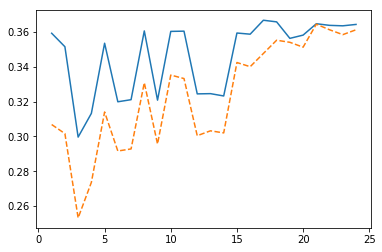

In [79]:
plt.plot(range(1, total), train_scores)
plt.plot(range(1, total), test_scores, '--')

Se observa que como mucho se llega a un ajuste del 40% de los datos a un modelado decente del conjunto de entrenamiento y prueba. (Estos para aproximadamente k = 11)
_____

11. Descubre cómo usar la regresión lineal en  clasificación y compara el valor de  precisión de clasificación con la precisión del algoritmo KNN.

In [80]:
# Tu solucion

12. Lee el archivo `advertising.csv` y almacena este conjunto de datos en un Dataframe  llamado `datos`.

In [81]:
# Tu solucion
import pandas as pd

datos = pd.read_csv("advertising.csv")
datos.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


13. Usa `info` y  `describe` en `datos`. Analiza tu respuesta.

In [82]:
# Tu solucion
print("------------ info: ----------\n", datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB
------------ info: ----------
 None


De **info():** El dataset presenta 10 columnas. Campos numéricos que no se puedan/deban considerar como categóricos son: *Daily Time Spent on Site, Area Income, Daily Internet Usage, Clicked on Ad*; datos categóricos que no se puedan/deban usar como numéricos: *Ad Topic Line, City, Male, Country*; y datos sujetos a intepretación del analista como *Age y Timestamp.* Al parecer todos los datos son trabajables (no nulos)

In [83]:
print("------------ describe: ----------\n", datos.describe())

------------ describe: ----------
        Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  


De **describe:** A parte de los resultados obvios de los rangos entre los que oscilan los valores contínuos, podemos observar que *features* como *Clicked on Ad* o *Male* están correctamente normalizados, pero presentando este último una tendencia del ~48% y desviación del ~49%.

14. Usemos seaborn para explorar los datos. Realiza los siguientes gráficos  que se muestran a continuación!

   - Crea un histograma para `age`
   - Crea un `joinplot` que muestre `Area Income` versus `Age`.
   - Crea un `joinplot` que muestre las distribuciones kde de  `Daily Time spent on site` vs. `Age`.
   - Crea un `joinplot `de `Daily Time Spent on Site` vs. `Daily Internet Usage`.
   - Crea un `pairplot` con `hue` definido por la característica de la columna `Clicked on Ad`. 
   
 Analiza tus resultados.

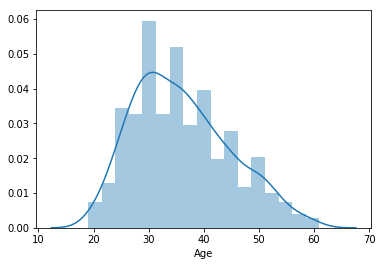

In [84]:
# Tu solucion
# 1. Crea un histograma para age
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

sb.distplot(datos.Age)

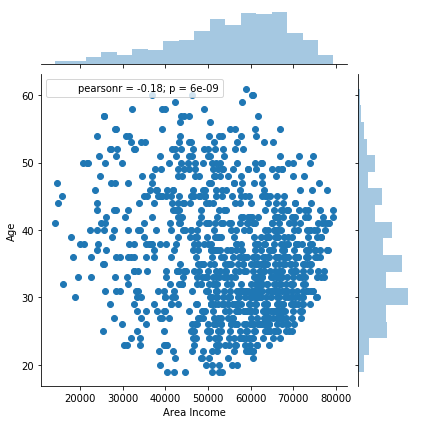

In [85]:
# 2. Crea un joinplot que muestre Area Income versus Age.
sb.jointplot(datos.loc[:,"Area Income"], datos.Age)

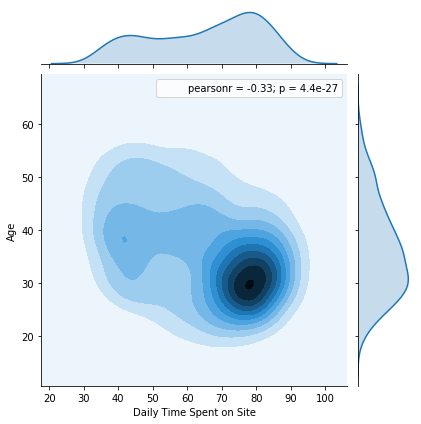

In [86]:
# 3. Crea un joinplot que muestre las distribuciones kde de  Daily Time
# spent on site vs. Age
sb.jointplot(datos.loc[:, "Daily Time Spent on Site"], datos.Age, kind="kde")


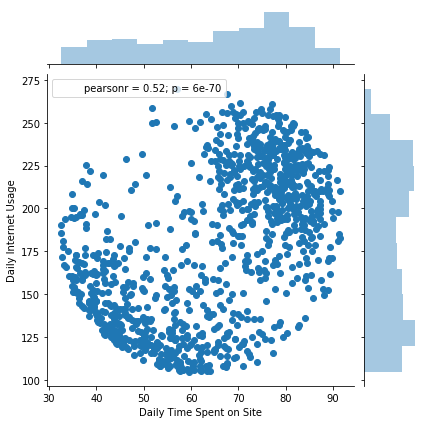

In [87]:
# 4. Crea un joinplotde Daily Time Spent on Site vs. Daily Internet Usage.
sb.jointplot(datos.loc[:,"Daily Time Spent on Site"], datos.loc[:, "Daily Internet Usage"])

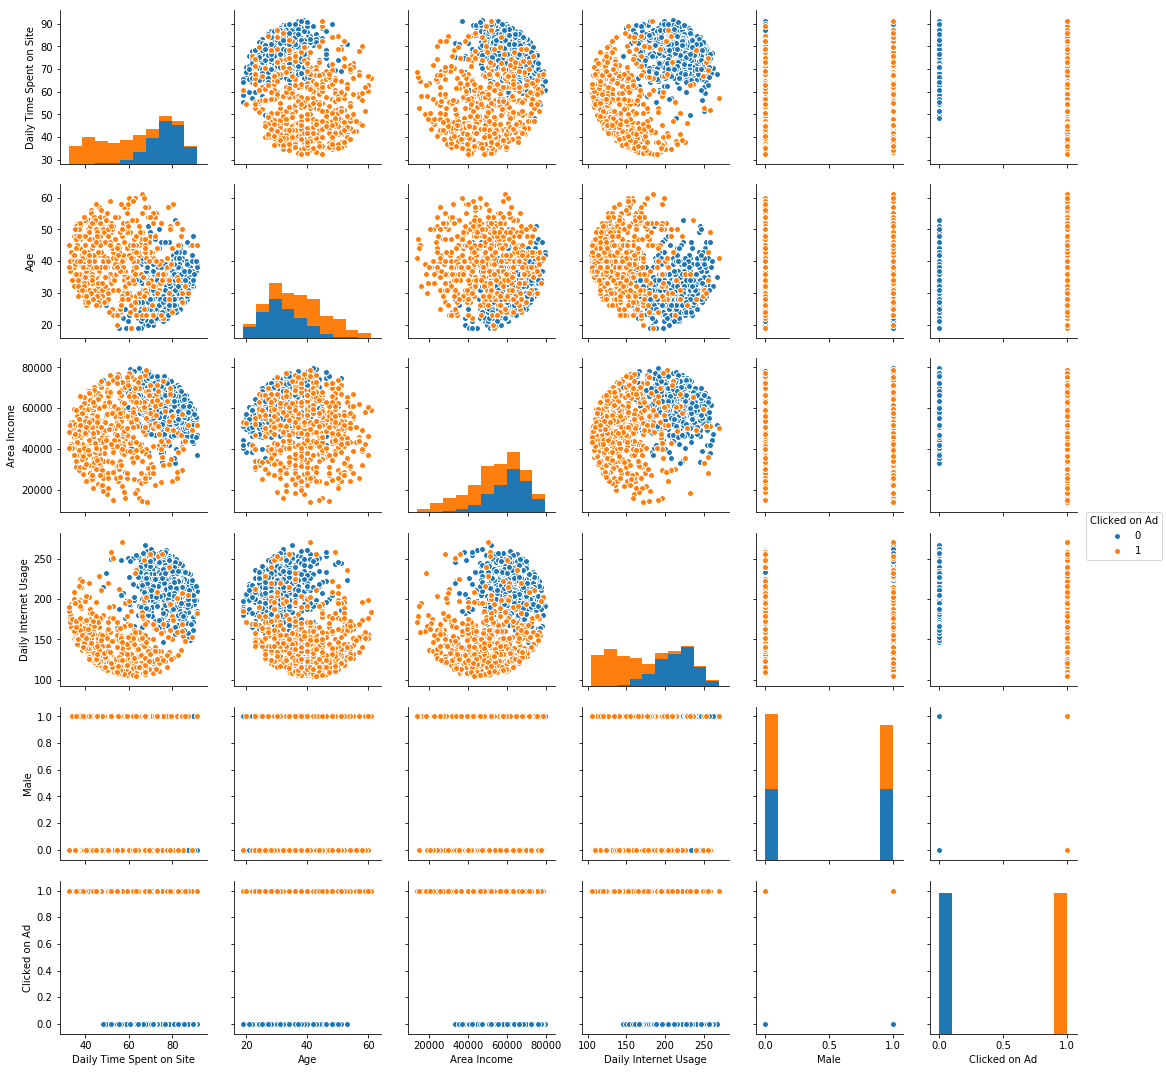

In [88]:
# 5. Crea un pairplot con hue definido por la característica de la columna Clicked on Ad
sb.pairplot(datos, hue="Clicked on Ad")

15. (Obligatorio).  Asumiendo que:

```
datos.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)
X = datos.drop(['Clicked on Ad'], axis = 1)
y = datos['Clicked on Ad']
```

- Divide los datos en el conjunto de entrenamiento y prueba usando `train_test_split`.
- Entrena y ajusta un modelo de regresión logística en el conjunto de entrenamiento.
- Pronostica valores para los datos de prueba.
- Crea un informe de clasificación para el modelo. Utiliza `classification_report`.

In [89]:
# Tu solucion
# Operando lo primero
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

datos.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis=1, inplace=True)
X = datos.drop(['Clicked on Ad'], axis = 1)
y = datos['Clicked on Ad']

In [90]:
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y)
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_predicted = log_reg.predict(X_test)

print(classification_report(y_test, y_predicted))

             precision    recall  f1-score   support

          0       0.93      0.94      0.93       128
          1       0.93      0.93      0.93       122

avg / total       0.93      0.93      0.93       250



16. (Obligatorio) Presenta un reporte del siguiente artículo de Sebastian Raschka: [Naive Bayes and Text Classification](http://sebastianraschka.com/Articles/2014_naive_bayes_1.html).

-----

# Naïve Bayes and Text Clas